In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [4]:
# we have 6 types of glass -> multiclass classification

In [5]:
data.duplicated().sum()

0

In [6]:
X = data.drop("Type of glass",axis=1)

In [7]:
y = data["Type of glass"]

In [8]:
X

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Note : wherever we have distance in algorithm, we will use scaling

In [11]:
# scaling

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[0.37089202, 0.20291777, 0.41304348, ..., 0.23605948, 0.        ,
        0.        ],
       [0.75586854, 0.35499558, 0.57509881, ..., 0.32156134, 0.04761905,
        0.47058824],
       [0.51173709, 0.30371353, 0.59090909, ..., 0.51672862, 0.        ,
        0.        ],
       ...,
       [0.43192488, 0.2020336 , 0.47233202, ..., 0.27509294, 0.        ,
        0.37254902],
       [0.84037559, 0.31874447, 0.66403162, ..., 0.36152416, 0.        ,
        0.        ],
       [0.47887324, 0.3045977 , 0.37351779, ..., 0.37081784, 0.        ,
        0.39215686]])

In [13]:
X_test

array([[ 0.04225352,  0.27586207,  0.4486166 ,  0.80178174,  0.33333333,
         0.59217877,  0.09178744,  0.2760223 ,  0.        ,  0.21568627],
       [ 0.92488263,  0.26348364,  0.78458498,  0.        ,  0.63862928,
         0.6461825 ,  0.        ,  0.32713755,  0.20952381,  0.        ],
       [ 0.30985915,  0.45137047,  0.45849802,  0.81291759,  0.18068536,
         0.44878957,  0.03059581,  0.41078067,  0.        ,  0.33333333],
       [ 0.89671362,  0.20822281,  0.81422925,  0.        ,  0.65109034,
         0.6461825 ,  0.        ,  0.30947955,  0.2031746 ,  0.17647059],
       [ 0.54929577,  0.255084  ,  0.59090909,  0.81959911,  0.47352025,
         0.41899441,  0.10305958,  0.22769517,  0.        ,  0.        ],
       [ 0.52112676,  0.71087533,  0.05731225,  0.        ,  0.14330218,
         0.60893855,  0.        ,  0.88568773,  0.        ,  0.        ],
       [ 0.07042254,  0.27851459,  0.41106719,  0.78841871,  0.29283489,
         0.63873371,  0.09339775,  0.27509294

In [14]:
def knn_training(x_train,y_train,x_test,k):
    '''
    x_train -> training data
    y_train -> label for training
    x_test -> validation data
    k -> number of nearest neighbours
    '''
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    return prediction

In [15]:
# how to decide the number of k ?
# pros and cons of knn

In [16]:
import math

n = data.shape

In [17]:
n

(214, 11)

In [18]:
k=math.sqrt(n[0])
k

14.628738838327793

In [19]:
pred = knn_training(X_train,y_train,X_test,int(k))
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 7, 2, 2, 2, 3, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 7, 2, 2, 2, 2, 7, 1])

In [20]:
accuracy_score(y_test,pred)

0.7906976744186046

In [25]:
k_value = range(1,20)
accuracy = []

for k in k_value:
    pred = knn_training(X_train,y_train,X_test,k)
    acc = accuracy_score(y_test,pred)
    accuracy.append(acc)
    print(f"for k = {k} ==> accuracy = {acc}")

for k = 1 ==> accuracy = 0.8837209302325582
for k = 2 ==> accuracy = 0.8837209302325582
for k = 3 ==> accuracy = 0.8837209302325582
for k = 4 ==> accuracy = 0.8604651162790697
for k = 5 ==> accuracy = 0.813953488372093
for k = 6 ==> accuracy = 0.8372093023255814
for k = 7 ==> accuracy = 0.8604651162790697
for k = 8 ==> accuracy = 0.8604651162790697
for k = 9 ==> accuracy = 0.813953488372093
for k = 10 ==> accuracy = 0.813953488372093
for k = 11 ==> accuracy = 0.813953488372093
for k = 12 ==> accuracy = 0.8372093023255814
for k = 13 ==> accuracy = 0.8372093023255814
for k = 14 ==> accuracy = 0.7906976744186046
for k = 15 ==> accuracy = 0.7906976744186046
for k = 16 ==> accuracy = 0.7674418604651163
for k = 17 ==> accuracy = 0.7674418604651163
for k = 18 ==> accuracy = 0.7674418604651163
for k = 19 ==> accuracy = 0.7674418604651163


In [23]:
accuracy

[0.8837209302325582,
 0.8837209302325582,
 0.8837209302325582,
 0.8604651162790697,
 0.813953488372093,
 0.8372093023255814,
 0.8604651162790697,
 0.8604651162790697,
 0.813953488372093,
 0.813953488372093,
 0.813953488372093,
 0.8372093023255814,
 0.8372093023255814,
 0.7906976744186046,
 0.7906976744186046,
 0.7674418604651163,
 0.7674418604651163,
 0.7674418604651163,
 0.7674418604651163]

In [24]:
max(accuracy)

0.8837209302325582

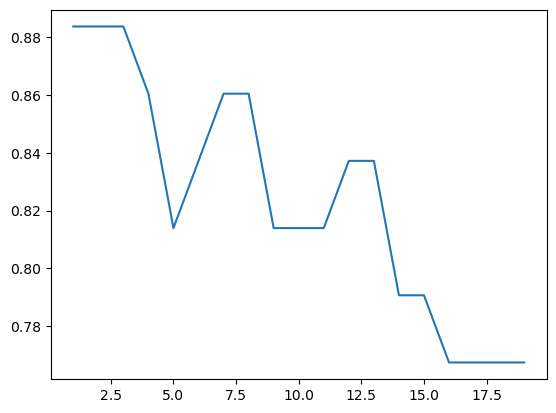

In [26]:
plt.plot(k_value,accuracy)